### Классическое вероятностное пространство

2.8. В ящике 10 красных и 6 синих пуговиц. Какова вероятность того, что две наудачу вынутые пуговицы будут одноцветными?

1. Аналитическое решение:

Общее число способов вынуть 2 пуговицы из 16: $C_{16}^{2} = \frac{16!}{2!(16-2)!} = \frac{16 \cdot 15}{2 \cdot 1} = 120$

Число способов вынуть 2 красные пуговицы: $C_{10}^{2} = \frac{10!}{2!(10-2)!} = \frac{10 \cdot 9}{2 \cdot 1} = 45$

Число способов вынуть 2 синие пуговицы: $C_{6}^{2} = \frac{6!}{2!(6-2)!} = \frac{6 \cdot 5}{2 \cdot 1} = 15$

Вероятность того, что две вынутые пуговицы будут одноцветными: $P = \frac{45 + 15}{120} = \frac{1}{2}$

2. Метод Монте-Карло:

In [1]:
import random
random.seed(a=42)

space = [0] * 10 + [1] * 6  # 0 - red, 1 - blue
    
def monte_carlo_probability(num_trials):
    k_success = 0
    prob_tmp = []

    for i in range(num_trials):
        sample = random.sample(space, 2)
        if sample[0] == sample[1]:
            k_success += 1
        prob_tmp.append(k_success / (i + 1))
        
    return k_success / num_trials, prob_tmp

num_trials = 10000
estimated_probability, prob_tmp = monte_carlo_probability(num_trials)
print(f"Estimated Probability (Monte Carlo): {estimated_probability}")

Estimated Probability (Monte Carlo): 0.5013


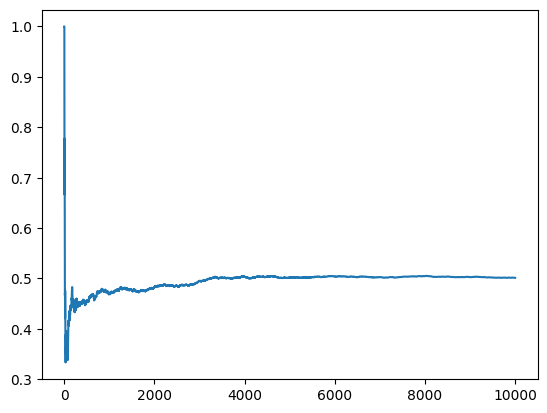

In [2]:
import matplotlib.pyplot as plt
plt.plot(prob_tmp)

2.21. В лотерее распространяются n билетов, из которых m выигрышные. Некто купил k билетов. С какой вероятностью среди них есть хотя бы один выигрышный?

1. Аналитическое решение:

Общее число способов выбрать k билетов из n: $C_{n}^{k} = \frac{n!}{k!(n-k)!}$

Число способов выбрать k билетов из (n - m) невыигрышных: $C_{n-m}^{k} = \frac{(n-m)!}{k!(n-m-k)!}$

Вероятность того, что среди k выбранных билетов нет выигрышных: $P(\text{нет выигрышных}) = \frac{C_{n-m}^{k}}{C_{n}^{k}}$

Вероятность того, что среди k выбранных билетов есть хотя бы один выигрышный: 

$$
P(\text{хотя бы один выигрышный}) = 1 - P(\text{нет выигрышных}) = 1 - \frac{C_{n-m}^{k}}{C_{n}^{k}}
$$

Пример: при n = 10, m = 2, k = 3:
$$
P(\text{хотя бы один выигрышный}) = 1 - \frac{C_{8}^{3}}{C_{10}^{3}} = 1 - \frac{56}{120} = \frac{64}{120} = \frac{16}{30} \approx 0.5333
$$

2. Метод Монте-Карло:

n=5, m=1, k=2 => Estimated Probability: 0.4044, Analytic Probability: 0.4
n=10, m=2, k=3 => Estimated Probability: 0.5354, Analytic Probability: 0.5333333333333333
n=20, m=4, k=5 => Estimated Probability: 0.7262, Analytic Probability: 0.7182662538699691
n=50, m=5, k=6 => Estimated Probability: 0.4827, Analytic Probability: 0.48743227170609227


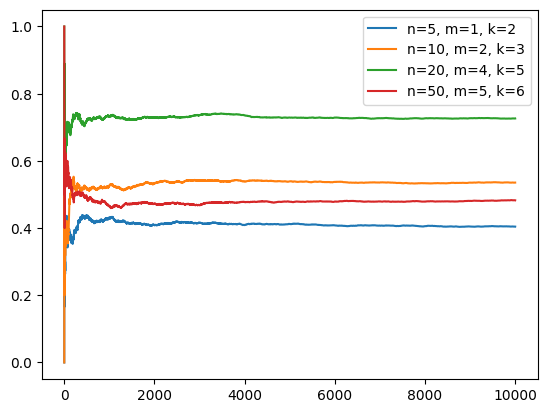

In [3]:
n_values = [5, 10, 20, 50]
m_values = [1, 2, 4, 5]
k_values = [2, 3, 5, 6]

def monte_carlo_lottery(n, m, k, num_trials):
    wins = 0
    tickets = [1] * m + [0] * (n - m)  # 1 - winning, 0 - non-winning
    prob_tmp = []

    for i in range(num_trials):
        selected_tickets = random.sample(tickets, k)
        if 1 in selected_tickets:
            wins += 1
        prob_tmp.append(wins / (i + 1))
        
    return wins / num_trials, prob_tmp

def analytic_lottery(n, m, k):
    from math import comb
    if k > n - m:
        return 1.0
    prob_no_wins = comb(n - m, k) / comb(n, k)
    return 1 - prob_no_wins

num_trials = 10000
for n, m, k in zip(n_values, m_values, k_values):
    estimated_probability, prob_tmp = monte_carlo_lottery(n, m, k, num_trials)
    analytic_probability = analytic_lottery(n, m, k)
    print(f"n={n}, m={m}, k={k} => Estimated Probability: {estimated_probability}, Analytic Probability: {analytic_probability}")
    plt.plot(prob_tmp, label=f'n={n}, m={m}, k={k}')
plt.legend()

3.7. На отрезок [0, a] наудачу брошены три точки. Найти вероятность того, что из отрезков, равных расстояниям от точки 0 до точек падения, можно составить треугольник.

1. Аналитическое решение:

Пусть $x_1, x_2, x_3$ - расстояния от точки 0 до точек падения.

Три неотрицательных числа могут быть сторонами треугольника, если ни одна из них не превышает сумму двух других.

Событие $A_i: X_i >= X_j + X_k$ 

События $A_1, A_2, A_3$ - попарно несовместны, следовательно

$$
P(A) = P(A_1 \cup A_2 \cup A_3) = P(A_1) + P(A_2) + P(A_3) = 3P(A_1)
$$
$X_1, X_2, X_3$ - независимые равномерные на [0, a], следовательно совместная плотность распределения:
$$
f(x_1, x_2, x_3) = \frac{1}{a^3}
$$
$$
P(A_1) = P(X_1 >= X_2 + X_3) = \int \int \int_{x_1 >= x_2 + x_3} f(x_1, x_2, x_3) dx_1 dx_2 dx_3 = \int \int \int_{x_1 >= x_2 + x_3} \frac{1}{a^3} dx_1 dx_2 dx_3
$$
$$
= \frac{1}{a^3} \int \int_{x_2 + x_3 <= a} (a - x_2 - x_3) dx_2 dx_3
$$

Пусть $Y_i = \frac{X_i}{a}$, тогда $Y_i$ - независимые равномерные на [0, 1], и
$$
P(A_1) = \int \int_{y_2 + y_3 <= 1} (1 - y_2 - y_3) dy_2 dy_3
$$
$$
= \int_{0}^{1} \int_{0}^{1 - y_3} (1 - y_2 - y_3) dy_2 dy_3 = \int_{0}^{1} \frac{(1 - y_3)^2}{2} dy_3 = \frac{1}{2} \left[ y_3 - y_3^2 + \frac{y_3^3}{3} \right]_{0}^{1} = \frac{1}{6}
$$
$$
P(A) = 3P(A_1) = 3 \cdot \frac{1}{6} = \frac{1}{2}
$$

Искомая вероятность:
$$
1 - P(A) = 1 - \frac{1}{2} = \frac{1}{2}
$$

2. Метод Монте-Карло:

a=0.5 => Estimated Probability: 0.5, Analytic Probability: 0.5
a=1 => Estimated Probability: 0.5004, Analytic Probability: 0.5
a=5 => Estimated Probability: 0.5, Analytic Probability: 0.5
a=10 => Estimated Probability: 0.5104, Analytic Probability: 0.5


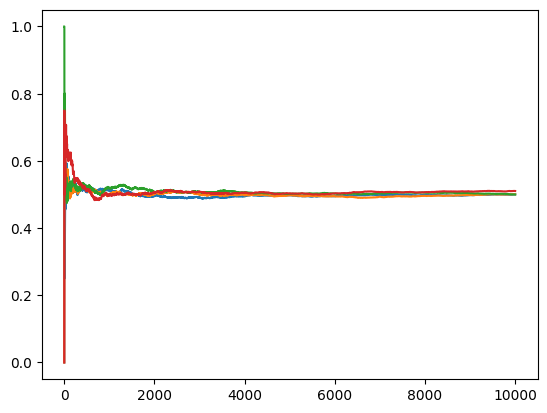

In [4]:
a_values = [0.5, 1, 5, 10]

def monte_carlo_triangle(a, num_trials):
    valid_triangles = 0
    prob_tmp = []

    for i in range(num_trials):
        x1, x2, x3 = random.uniform(0, a), random.uniform(0, a), random.uniform(0, a)
        if (x1 < x2 + x3) and (x2 < x1 + x3) and (x3 < x1 + x2):
            valid_triangles += 1
        prob_tmp.append(valid_triangles / (i + 1))
    return valid_triangles / num_trials, prob_tmp

def analytic_triangle(a):
    return 1 / 2

num_trials = 10000
for a in a_values:
    estimated_probability, prob_tmp = monte_carlo_triangle(a, num_trials)
    analytic_probability = analytic_triangle(a)
    print(f"a={a} => Estimated Probability: {estimated_probability}, Analytic Probability: {analytic_probability}")
    plt.plot(prob_tmp, label=f'a={a}')
